# **Mnist Classification**

In [ ]:
# Building an Image Classifier Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Using Keras to load the dataset
# Every image is represented as a 28 × 28 array
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)


X_train shape =  (60000, 28, 28)  X_test shape =  (10000, 28, 28)


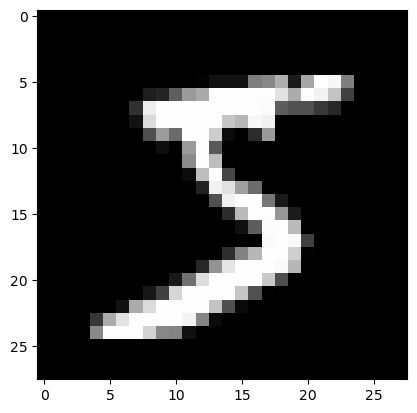

In [ ]:
plt.imshow(X_train [0], cmap="gray")

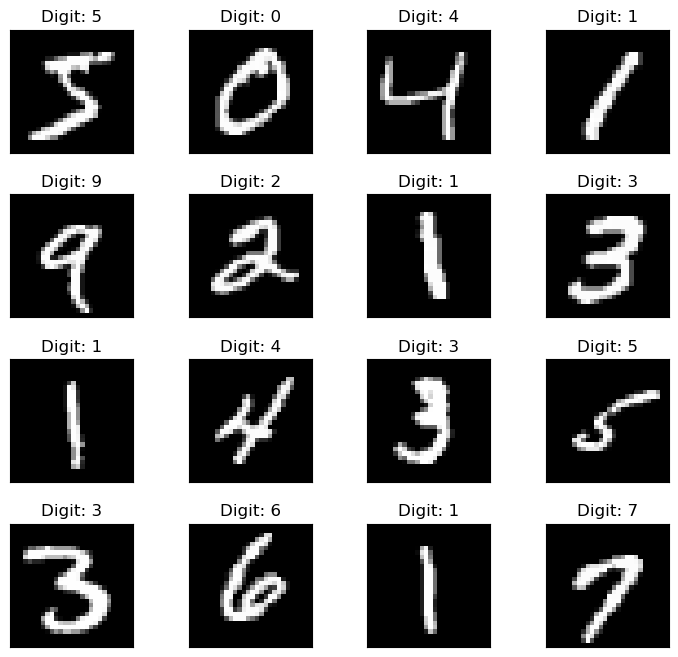

In [ ]:
fig = plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap="gray", interpolation="none")
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])


In [ ]:
# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0
# (this also converts them to floats).
X_train = X_train / 255.0
X_test  = X_test / 255.0


In [ ]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# The model’s summary() method displays all the model’s layers
print(model.summary())


C:\Users\Nvidia\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,160 (1.03 MB)

 Trainable params: 271,160 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
               metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5589 - loss: 1.5398 - val_accuracy: 0.8888 - val_loss: 0.4097
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8918 - loss: 0.3914 - val_accuracy: 0.9141 - val_loss: 0.3047
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.3036 - val_accuracy: 0.9248 - val_loss: 0.2628
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9242 - loss: 0.2637 - val_accuracy: 0.9358 - val_loss: 0.2286
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9334 - loss: 0.2361 - val_accuracy: 0.9409 - val_loss: 0.2102
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9398 - loss: 0.2093 - val_accuracy: 0.9476 - val_loss: 0.1909
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9446 - loss: 0.1919 - val_accuracy: 0.9495 - val_loss: 0.1818
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.1675 - val_accuracy: 0.

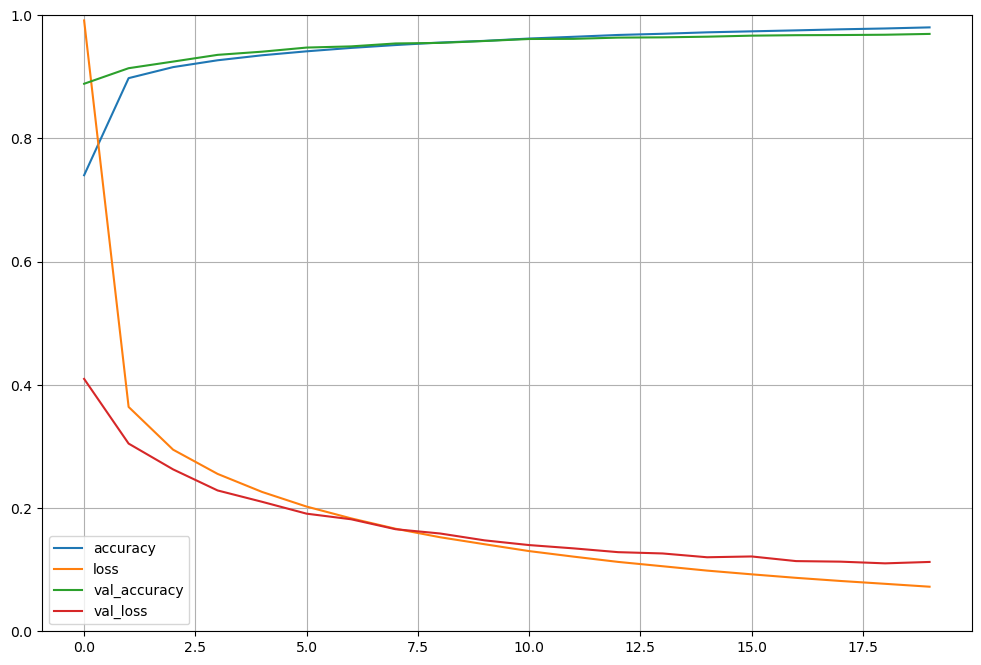

-----------------------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9648 - loss: 0.1215  
Loss                       :  0.10354600846767426
accuracy                   :  0.9696999788284302


In [ ]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                       : ",model_evaluate[0])
print("accuracy                   : ",model_evaluate[1])


In [ ]:
y_pred = model.predict(X_test)
y_pred[0].argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


7

Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.96       892
           6       0.99      0.96      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.93      0.98      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion matrix : 



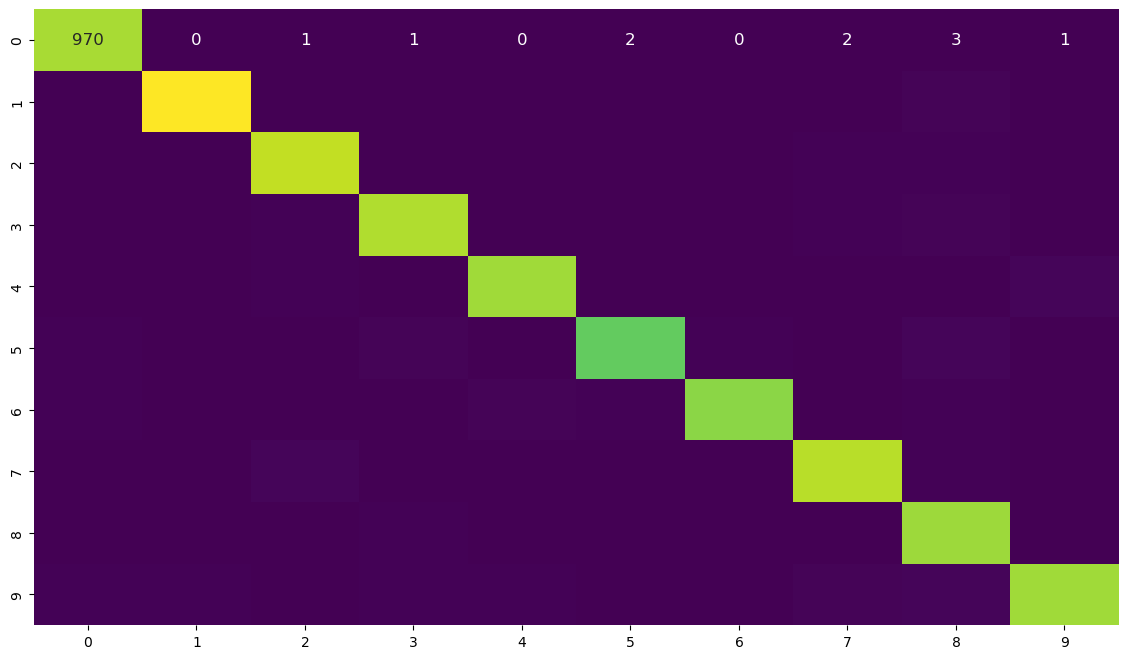

Normalized confusion matrix : 



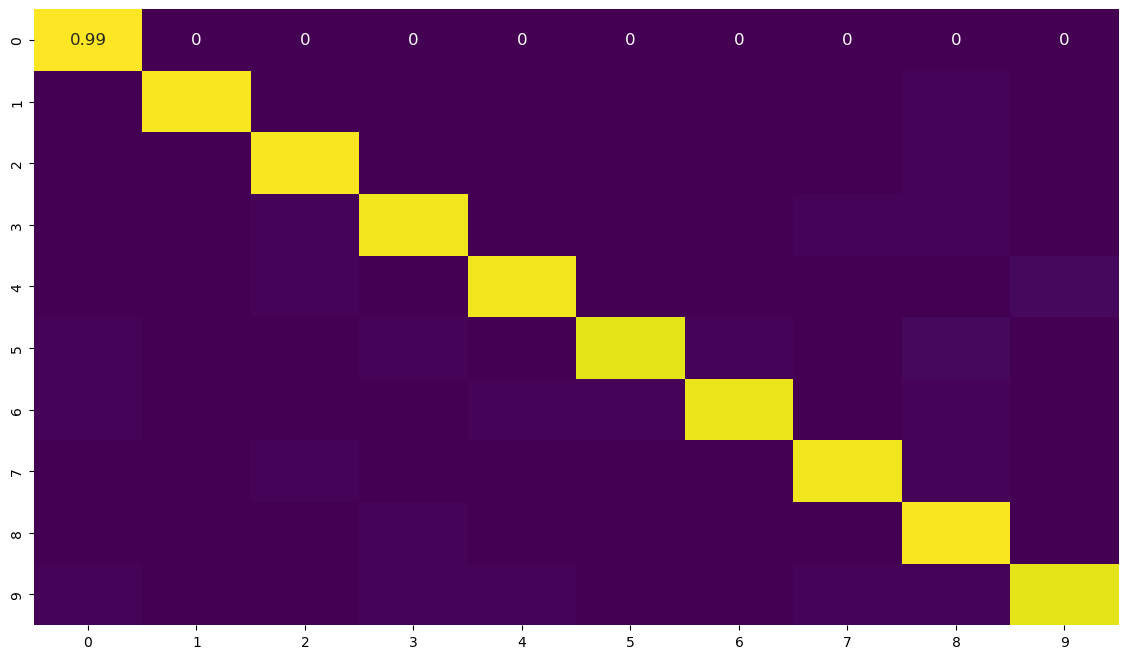

In [ ]:
# Confusion Matrix

y_pred = np.argmax(y_pred, axis=-1)

class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
    conf_matx = confusion_matrix(true, preds, normalize = normalize)
    conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

    plt.subplots(figsize=(14,8))
    sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
    plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred, "true")


In [ ]:
# Make predictions
# predicted = model.predict(X_new)

# Save and Load Your Model
model.save("my_model.h5")

# Loading the model:
# my_model = keras.models.load_model("my_model.h5")


In [ ]:
my_model